In [16]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex 
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, load_spectral_types
df_spec = load_spectral_types()
df_spec

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [5]:
style(name="seaborn-notebook")

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [8]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries = boundaries[:15]
boundaries

array([[-0.019     ,  0.12400287],
       [ 0.12400287,  0.18800095],
       [ 0.18800095,  0.21900118],
       [ 0.21900118,  0.24100237],
       [ 0.24100237,  0.25900047],
       [ 0.25900047,  0.27500098],
       [ 0.27500098,  0.28800311],
       [ 0.28800311,  0.30000054],
       [ 0.30000054,  0.3120019 ],
       [ 0.3120019 ,  0.32300249],
       [ 0.32300249,  0.33300231],
       [ 0.33300231,  0.34300214],
       [ 0.34300214,  0.35300196],
       [ 0.35300196,  0.36200101],
       [ 0.36200101,  0.376     ]])

In [9]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05250143, 0.15600191, 0.20350107, 0.23000178, 0.25000142,
       0.26700073, 0.28150205, 0.29400182, 0.30600122, 0.3175022 ,
       0.3280024 , 0.33800223, 0.34800205, 0.35750149, 0.36900051])

In [227]:
mcmc_dir = join(root_data_dir, "MCMC", "dm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC/dm/data'

In [216]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(-0.019)_(0.124).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.124)_(0.188).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.188)_(0.219).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.219)_(0.241).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.241)_(0.259).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.259)_(0.275).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.275)_(0.288).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.288)_(0.300).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.300)_(0.312).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.312)_(0.323).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.323)_(0.333).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/dm/data/chain-(0.333)_(0.343).npy',
 '/home2/s20321005/Thesis-Project/Data/

# Fungsi interpolasi

In [13]:
from utils import inv_simple, inv_standard, simple, standard

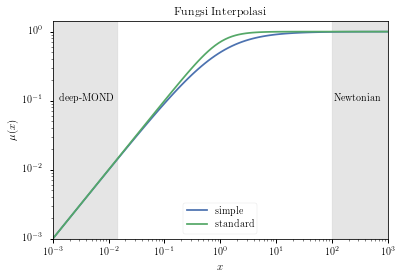

In [228]:
x = np.logspace(-3, 3, 100)
y_simple = simple(x)
y_standard = standard(x)

plt.plot(x, y_simple, label="simple")
plt.plot(x, y_standard, label="standard")
plt.axvspan(0.001, 0.015, alpha=0.2, color="gray")
plt.axvspan(100, 1000, alpha=0.2, color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$x$")
plt.ylabel(r"$\mu(x)$")
plt.title("Fungsi Interpolasi")
plt.xlim(x.min(), x.max())
plt.ylim(y_simple.min())
plt.text(0.0013, 0.1, r"deep-MOND", fontsize=10)
plt.text(110, 0.1, r"Newtonian", fontsize=10)
plt.legend()
# plt.savefig(join("img", "fungsi-interpolasi.pdf"), dpi=70)
plt.show()


## tes

In [221]:
index = 0
df = np.load(files[index])
df.shape

(2500, 330, 33)

In [229]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoD = df[:, :, 24].reshape(-1)/1E-2
length = rhob.shape[0]
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# rhoD = rhob - rhob0
# rhoD = rhob*(1/mu0-1)
rhoD

array([ 1.04933864,  1.13998853,  1.20240012, ...,  2.64158052,
       -0.06207846,  2.35256384])

# plot

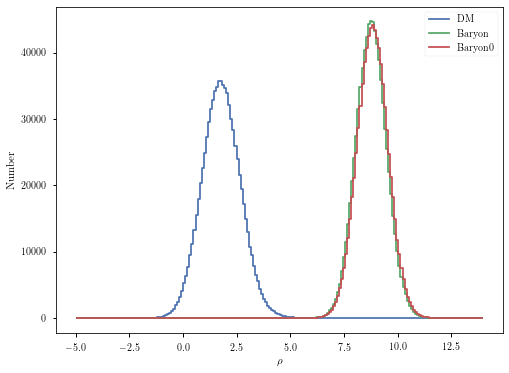

In [230]:
rho = np.linspace(-5, 14, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [231]:
rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
rhoD_fit = norm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
rhob_fit = norm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((1.8364059294936528, 0.8706383705106304),
 (8.832906272774595, 0.7002069165403297),
 (8.889245703953849, 0.7113563405541673))

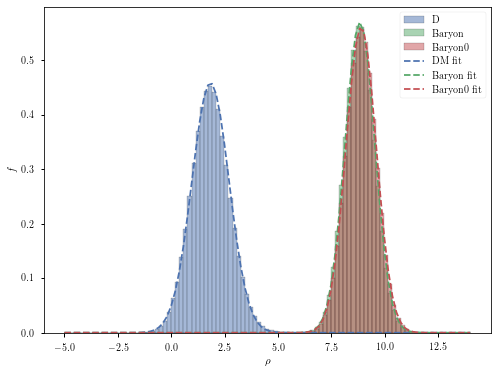

In [232]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='D', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, norm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoD_fit, rhob_fit, rhob0_fit

rhoD = 1.84 +0.86/-0.87
rhob = 8.83 +0.70/-0.69
rhob0 = 8.89 +0.71/-0.71


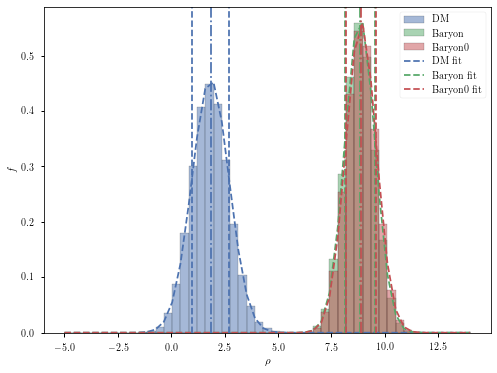

In [233]:
sigma = np.array([68, 90, 95])
alphas = 1 - sigma/100

hpd, modes = hdi(lambda x: norm.pdf(x, *rhoD_fit), -3, 7, alpha=alphas[0])
rhoD_mode = modes[0]
rhoD_low, rhoD_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob_fit), 5, 12.5, alpha=alphas[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alphas[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, norm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoD = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


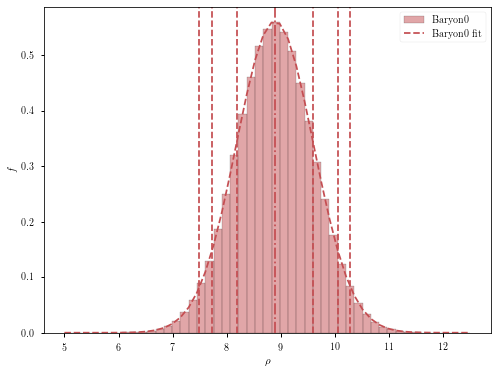

In [234]:
rhob0_low = []
rhob0_high = []
for i, alpha in enumerate(alphas):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alpha)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [23]:
rhob0.shape

(800000,)

In [235]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    # mu0 = df[:,:,24].reshape(-1)
    rhob0_v = np.random.choice(rhob0, size=len(rhob), replace=False)
    # rhoD = rhob*(1/mu0-1)
    rhoD = df[:,:,24].reshape(-1)/1E-2
    # print("fitting...")
    rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
    rhoD_fit = norm.fit(rhoD_sample)
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = norm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoD_err = []
    rhob_err = []
    rhoD_mode = None
    rhob_mode = None
    for i, alpha in enumerate(alphas):
        hpd, modes = hdi(lambda x: norm.pdf(x, *rhoD_fit), -5, 10, alpha=alpha)
        rhoDM_mode = modes[0]
        low, high = hpd[0]
        rhoD_err.append({'alpha': alpha, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: norm.pdf(x, *rhob_fit), 5, 15, alpha=alpha)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alpha, 'low': low, 'high': high})
    rhoD_errs.append(rhoD_err)
    rhob_errs.append(rhob_err)
    rhoD_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 15/15 [00:02<00:00,  6.81it/s]


In [236]:
rhoD_fits

[(1.8421500670178392, 0.895066938882686),
 (3.5638520949351458, 2.0044272018770477),
 (5.896903933426778, 2.905031710331002),
 (6.648853286055684, 1.5062369458993228),
 (7.912518611813014, 1.9368864452062737),
 (6.767148010324356, 2.146622626080516),
 (6.11049973813049, 1.6547558871536994),
 (6.136215768213652, 2.961106590428509),
 (2.1426632914367802, 1.4744941381440861),
 (2.907737009283864, 1.6765199656873364),
 (3.8814950698515873, 2.409696120801),
 (1.956967053025014, 1.6459053010001912),
 (1.3650283828707819, 1.7623301200165562),
 (3.2324336117351473, 1.828543378814971),
 (0.18587986548632837, 1.412415287438245)]

(-1.0, 7.0)

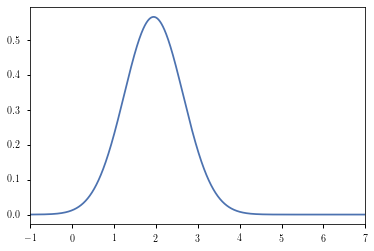

In [237]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoD = None
for i, p in enumerate(rhoD_fits):
    # if i > 1: # A
    # if i < 2 or i > 8: # F
    if i < 9: # G
        continue
    if log_rhoD is None:
        log_rhoD = norm.logpdf(rho, *p)
    else:
        log_rhoD += norm.logpdf(rho, *p)
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find area
area = np.trapz(rhoD_com, rho)
# normalize
rhoD_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(-1,7)

In [238]:
def normpdf(x, *args):
    A, other = args[0], args[1:]
    return A*norm.pdf(x, *other)

rhoD_com_fit, _ = curve_fit(normpdf, rho, rhoD_com, p0=[1, 1.0, 2.0])
rhoD_com_fit

array([1.        , 1.94348788, 0.7036899 ])

(-1.0, 5.0)

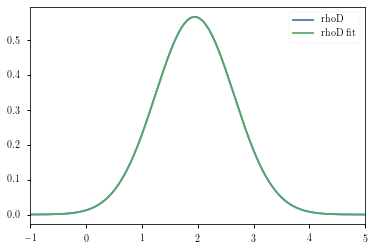

In [239]:
plt.plot(rho, rhoD_com, label='rhoD')
plt.plot(rho, normpdf(rho, *rhoD_com_fit), label='rhoD fit')
plt.legend()
plt.xlim(-1,5)

In [240]:
rhoD_com_err = []
rhoD_com_mode = None
for i, alpha in enumerate(alphas):
    hpd, modes = hdi(lambda x: normpdf(x, *rhoD_com_fit), low=-1, high=7, alpha=alpha)
    low, high = hpd[0]
    rhoD_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoD_com_mode = modes[0]
rhoD_com_mode, rhoD_com_err

(1.95,
 [{'sigma': array([68, 90, 95]), 'low': 1.25, 'high': 2.64},
  {'sigma': array([68, 90, 95]), 'low': 0.79, 'high': 3.1},
  {'sigma': array([68, 90, 95]), 'low': 0.56, 'high': 3.32}])

In [241]:
print(f"{rhoD_com_mode} + {rhoD_com_err[0]['high']-rhoD_com_mode} - {rhoD_com_mode-rhoD_com_err[0]['low']}")

1.95 + 0.6900000000000002 - 0.7


In [242]:
A9 = df_spec[df_spec['SpT'] == 'A9V']['J-K'].values[0]
F0 = df_spec[df_spec['SpT'] == 'F0V']['J-K'].values[0]
AF = (A9+F0)/2

F9 = df_spec[df_spec['SpT'] == 'F9V']['J-K'].values[0]
G0 = df_spec[df_spec['SpT'] == 'G0V']['J-K'].values[0]
FG = (F9+G0)/2
AF, FG

(0.1355, 0.314)

In [29]:
# for i in range(len(c)):
#     print(r"${}\leq c < {}$ & {:.02f} & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] & [{:.02f},{:.02f}] \\".format(c1[i], c2[i], rhoDM_mode[i], rhoDM_low68[i], rhoDM_high68[i], rhoDM_low90[i], rhoDM_high90[i], rhoDM_low95[i], rhoDM_high95[i]))

In [32]:
c

array([0.05363119, 0.15714132, 0.20370096, 0.23023754, 0.2502606 ,
       0.26738875, 0.28186325, 0.29440782, 0.30622866, 0.3180495 ,
       0.3296291 , 0.34024373, 0.35037588, 0.36026679, 0.36967521])

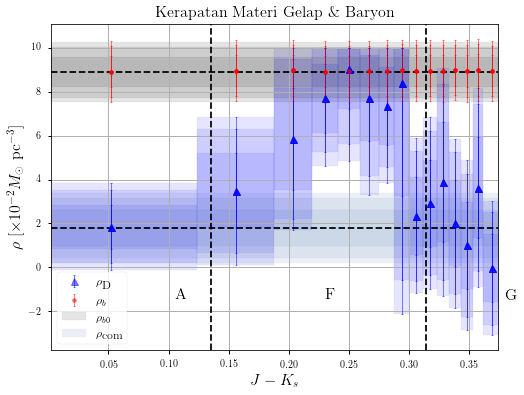

1.79

In [41]:
cs = np.linspace(c.min()-0.05, c.max()+0.005, 100)

def band(ax, c1, c2, rhoDM_mode, low, high, color='blue', alpha=0.1):
    ax.fill_between([c1, c2], [low, low], [high, high], color=color, alpha=alpha)
    return 

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoD_errs])
    high = np.array([err[i]['high'] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='^', color='blue', capsize=1, alpha=0.5, elinewidth=1, markeredgewidth=1)
    for j in range(len(c)):
        band(ax, c1[j], c2[j], rhoD_modes[j], low[j], high[j], color='blue', alpha=0.1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='.', color='red', capsize=1, alpha=0.5, elinewidth=1, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoD_com_ax = ax.fill_between(cs, rhoD_com_err[i]['low'], rhoD_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')

ax.axvline(x=AF, color='black', linestyle='--')
ax.axvline(x=FG, color='black', linestyle='--')
ax.text(0.105, -1.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -1.5, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -1.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
# fig.savefig(join('img', 'rhoD-no.pdf'), dpi=70)
plt.show()
rhoD_com_mode

In [42]:
for i in range(len(c)):
    low1 = np.array([err[0]['low'] for err in rhoD_errs])
    high1 = np.array([err[0]['high'] for err in rhoD_errs])
    low2 = np.array([err[1]['low'] for err in rhoD_errs])
    high2 = np.array([err[1]['high'] for err in rhoD_errs])
    low3 = np.array([err[2]['low'] for err in rhoD_errs])
    high3 = np.array([err[2]['high'] for err in rhoD_errs])
    print(f"$[{c1[i]:.03f}, {c2[i]:.03f}]$ & {rhoD_modes[i]:.02f} & $[{low1[i]:.02f}, {high1[i]:.02f}]$ & $[{low2[i]:.02f}, {high2[i]:.02f}]$ & $[{low3[i]:.02f}, {high3[i]:.02f}]$ \\\\")

$[-0.019, 0.124]$ & 1.84 & $[0.84, 2.85]$ & $[0.18, 3.50]$ & $[-0.14, 3.82]$ \\
$[0.124, 0.188]$ & 3.49 & $[1.78, 5.21]$ & $[0.67, 6.32]$ & $[0.13, 6.86]$ \\
$[0.188, 0.219]$ & 5.85 & $[3.53, 8.17]$ & $[2.20, 9.50]$ & $[1.68, 10.00]$ \\
$[0.219, 0.241]$ & 7.70 & $[6.14, 9.27]$ & $[5.26, 10.00]$ & $[4.60, 10.00]$ \\
$[0.241, 0.259]$ & 9.03 & $[7.22, 10.00]$ & $[5.60, 10.00]$ & $[4.84, 10.00]$ \\
$[0.259, 0.275]$ & 7.70 & $[5.77, 9.65]$ & $[4.18, 10.00]$ & $[3.29, 10.00]$ \\
$[0.275, 0.288]$ & 7.33 & $[5.55, 9.11]$ & $[4.58, 10.00]$ & $[3.85, 10.00]$ \\
$[0.288, 0.300]$ & 8.40 & $[3.25, 10.00]$ & $[-0.57, 10.00]$ & $[-2.13, 10.00]$ \\
$[0.300, 0.312]$ & 2.35 & $[0.56, 4.13]$ & $[-0.60, 5.30]$ & $[-1.17, 5.87]$ \\
$[0.312, 0.323]$ & 2.92 & $[0.93, 4.91]$ & $[-0.37, 6.22]$ & $[-1.00, 6.85]$ \\
$[0.323, 0.333]$ & 3.88 & $[1.14, 6.62]$ & $[-0.57, 8.34]$ & $[-1.32, 9.08]$ \\
$[0.333, 0.343]$ & 2.00 & $[0.05, 3.96]$ & $[-1.23, 5.24]$ & $[-1.85, 5.85]$ \\
$[0.343, 0.353]$ & 1.00 & $[-0.97, 2.98

# $a_0$

interpolation function
**Simple**
\begin{aligned}
    \mu(x) = \frac{x}{1+x}
\end{aligned}

**Standard**
\begin{aligned}
    \mu(x) = \sqrt{\frac{x^2}{1+x^2}}
\end{aligned}

## Inverse

**Simple**
\begin{equation*}
    x = \frac{\mu}{1-\mu}
\end{equation*}

**Standard**
\begin{equation*}
    x = \frac{\mu}{\sqrt{1-\mu^2}}
\end{equation*}

In [43]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
from scipy.integrate import simps
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [44]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [45]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [46]:
from utils import style, hdi, load_spectral_types
df_spec = load_spectral_types()
df_spec

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [47]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [48]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [49]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
# boundaries = boundaries[:15]
boundaries

array([[-0.019     ,  0.12400287],
       [ 0.12400287,  0.18800095],
       [ 0.18800095,  0.21900118],
       [ 0.21900118,  0.24100237],
       [ 0.24100237,  0.25900047],
       [ 0.25900047,  0.27500098],
       [ 0.27500098,  0.28800311],
       [ 0.28800311,  0.30000054],
       [ 0.30000054,  0.3120019 ],
       [ 0.3120019 ,  0.32300249],
       [ 0.32300249,  0.33300231],
       [ 0.33300231,  0.34300214],
       [ 0.34300214,  0.35300196],
       [ 0.35300196,  0.36200101],
       [ 0.36200101,  0.376     ]])

In [50]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05250143, 0.15600191, 0.20350107, 0.23000178, 0.25000142,
       0.26700073, 0.28150205, 0.29400182, 0.30600122, 0.3175022 ,
       0.3280024 , 0.33800223, 0.34800205, 0.35750149, 0.36900051])

In [51]:
mcmc_dir = join(root_data_dir, "MCMC", "no", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC/no/data'

In [115]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
# files = files[:15]
files

['/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(-0.019)_(0.124).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.124)_(0.188).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.188)_(0.219).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.219)_(0.241).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.241)_(0.259).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.259)_(0.275).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.275)_(0.288).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.288)_(0.300).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.300)_(0.312).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.312)_(0.323).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.323)_(0.333).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC/no/data/chain-(0.333)_(0.343).npy',
 '/home2/s20321005/Thesis-Project/Data/

In [131]:
index = 3
df = np.load(files[index])
df.shape

(2500, 330, 33)

In [132]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
mu0 = df[:, :, 24].reshape(-1)
length = rhob.shape[0]
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

In [133]:
rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
rhob_fit = norm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)
# mu0_sample = np.random.choice(mu0, size=10_000, replace=False)
# mu0_fit = norm.fit(mu0_sample)

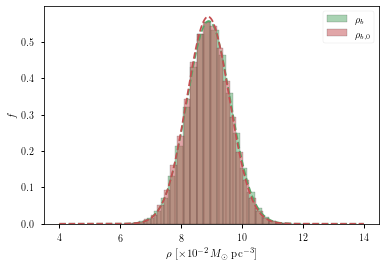

In [134]:
rho = np.linspace(4, 14, 1000)

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(rhob, bins=30, density=True, label=r'$\rho_{b}$', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=30, density=True, label=r'$\rho_{b,0}$', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob_fit), color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), color='C2', ls='--')
ax.set_xlabel(r'$\rho$ [$\times 10^{-2} M_{\odot}$ pc$^{-3}$]')
ax.set_ylabel(r'$f$')
ax.legend()
# fig.savefig(join('img', 'pdf-rhob.png'), dpi=300)
plt.show()

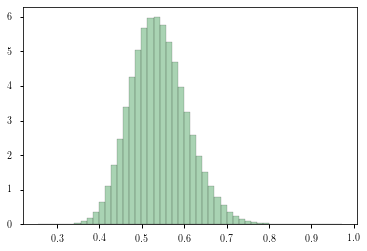

In [135]:
plt.hist(mu0, bins=50, density=True, label=r'$\rho_{b}$', ec='k', alpha=0.5,color='C1');

849205.1254885558


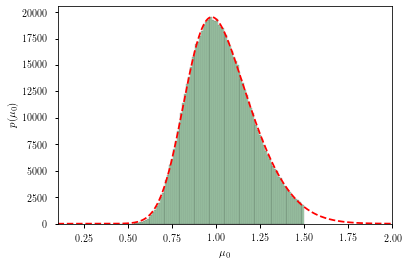

array([8.96933942e+03, 2.36871415e+00, 8.29176033e-01, 2.85153085e-01])

In [206]:
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

def skew(x, *args):
    a = args[0]
    others = args[1:]
    return a*skewnorm.pdf(x, *others)

print(mu0.sum())
mu0_hist, mu0_edge = np.histogram(mu0, bins=100)
mu0_mid = (mu0_edge[:-1]+mu0_edge[1:])/2
delta_mu0 = mu0_edge[1] - mu0_edge[0]

mu0_fit_un, _ = curve_fit(skew, mu0_mid, mu0_hist, p0=[1, 1, 1.0, 0.1])

mu0_x = np.linspace(0.1, 2, 1000)
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(mu0_mid, mu0_hist, width=delta_mu0, ec='k', alpha=0.5,color='C1')
# ax.hist(mu0, bins=100, density=True, ec='k', alpha=0.5,color='C1')
ax.plot(mu0_x, skew(mu0_x, *mu0_fit_un), color='r', ls='--')
plt.xlabel(r'$\mu_0$')
plt.ylabel(r'$p(\mu_0)$')
plt.xlim(mu0_x.min(), mu0_x.max())
plt.ylim(0)
# fig.savefig(join('img', 'pdf-rhob.png'), dpi=300)
plt.show()
mu0_fit_un

100%|██████████| 15/15 [00:01<00:00,  9.11it/s]


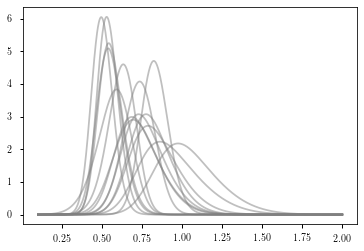

In [207]:
mu0_fits = np.empty((len(files), 3))
for index in tqdm(range(len(files))):
    df = np.load(files[index])
    mu0 = df[:, :, 24].reshape(-1)
    mu0_hist, mu0_edge = np.histogram(mu0, bins=100)
    mu0_mid = (mu0_edge[:-1]+mu0_edge[1:])/2
    delta_mu0 = mu0_edge[1] - mu0_edge[0]

    mu0_fit_un, _ = curve_fit(skew, mu0_mid, mu0_hist, p0=[8.96933942e+03, 1, 8.29176033e-01, 2.85153085e-01])
    mu0_fits[index] = mu0_fit_un[1:]
    # plt.figure()
    plt.plot(mu0_x, skewnorm.pdf(mu0_x, *mu0_fits[index]), c="gray", alpha=0.5)
    # plt.hist(mu0, bins=50, density=True, ec='k', alpha=0.5,color='C1');
    # plt.title(index)
    # plt.show()
    

In [186]:
mu0_fits

array([[ 1.14841359,  0.76698421,  0.10735235],
       [-0.8993083 ,  0.79192793,  0.11637855],
       [-1.35005895,  0.69482845,  0.11495464],
       [ 1.52187575,  0.4800258 ,  0.09049297],
       [ 1.31442602,  0.44865592,  0.08680497],
       [ 1.32691341,  0.4829602 ,  0.10339845],
       [ 1.73716319,  0.48343197,  0.10850469],
       [-1.60670938,  0.66954277,  0.14524503],
       [ 1.95763203,  0.67285138,  0.19177174],
       [ 2.19569857,  0.62544444,  0.19802697],
       [ 1.75682794,  0.58858698,  0.19675013],
       [ 2.30857116,  0.67075801,  0.22688696],
       [ 2.62256131,  0.72037471,  0.28558983],
       [ 2.36369239,  0.57993269,  0.20760118],
       [ 2.36871439,  0.82917603,  0.28515309]])

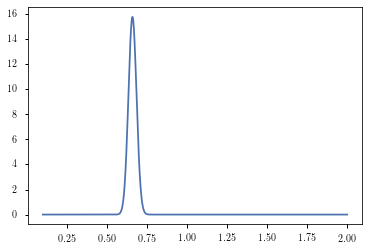

In [208]:
mu0 = np.linspace(-0.5, 2.5, 10000)
log_com = None
for p in mu0_fits:
    if log_com is None:
        log_com = skewnorm.logpdf(mu0_x, *p)
    else:
        log_com += skewnorm.logpdf(mu0_x, *p)
area = np.trapz(np.exp(log_com), mu0_x)
y = np.exp(log_com) / area
plt.plot(mu0_x, y)

In [209]:
mu0_com_fit, _ = curve_fit(skewnorm.pdf, mu0_x, y, p0=[1, 1, 0.1])
mu0_com_fit

array([0.51615434, 0.64960342, 0.0271672 ])

array([0.51615434, 0.64960342, 0.0271672 ])

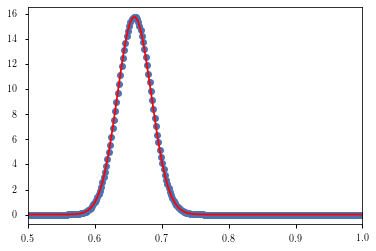

In [210]:
plt.plot(mu0_x, y, 'o')
plt.plot(mu0_x, skewnorm.pdf(mu0_x, *mu0_com_fit), 'r-')
plt.xlim(0.5, 1.)
mu0_com_fit

In [211]:
mu0_com_fit

array([0.51615434, 0.64960342, 0.0271672 ])

100%|██████████| 15/15 [00:00<00:00, 102.62it/s]


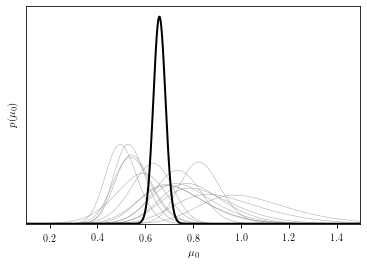

In [212]:
plt.figure()
for index in tqdm(range(len(files))):
  yv = skewnorm.pdf(mu0_x, *mu0_fits[index])
  plt.plot(mu0_x, yv, c="gray", alpha=0.7, lw=0.5)
yv = skewnorm.pdf(mu0_x, *mu0_com_fit)
plt.plot(mu0_x, yv, 'k', lw=2)
plt.ylim(0)
plt.xlim(mu0_x.min(), 1.5)
plt.xlabel(r"$\mu_0$")
plt.yticks([])
plt.ylabel(r"$p(\mu_0)$")
plt.savefig(join("img", "mu0.pdf"), dpi=300)
plt.show()

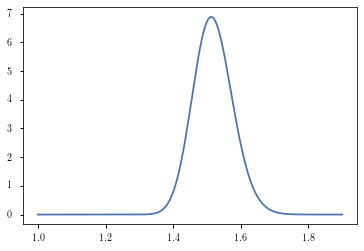

1.510 +0.060 - 0.050


In [213]:
nu = np.linspace(1, 1.9, 1000)

plt.plot(nu, skewnorm.pdf(1/nu, *mu0_com_fit)/nu**2)
plt.show()

hpd, modes = hdi(lambda x: skewnorm.pdf(1/x, *mu0_com_fit)/x**2, 1, 2, alpha=0.32)
low, high = hpd[0]
mode = modes[0]

print(f"{mode:.3f} +{high-mode:.3f} - {mode-low:.3f}")

In [203]:
def pdf_mu0(mu0, *mu0_fit):
    mu0 = np.atleast_1d(mu0)
    return skewnorm.pdf(mu0, *mu0_fit)

In [204]:
def pdf_x(x, mu_func, *mu0_fit):
    x = np.atleast_1d(x)
    mu0 = mu_func[0](x)
    val = pdf_mu0(mu0, *mu0_fit)*np.abs(mu_func[1](x))
    return val

def mu0_simple(x):
    return x/(1+x)
def mu0_deriv_simple(x):
    return 1/(1+x)**2

def mu0_standard(x):
    return x/np.sqrt(1+x**2)
def mu0_deriv_standard(x):
    return 1/np.power(1+x**2, 3/2)

mu0_simple_func = [mu0_simple, mu0_deriv_simple]
mu0_standard_func = [mu0_standard, mu0_deriv_standard]

x = np.logspace(-0.5, 2.3, 500)
pdf_x_sample = pdf_x(x, mu0_simple_func, *mu0_fit)
pdf_x_standard = pdf_x(x, mu0_standard_func, *mu0_fit)

plt.plot(x, pdf_x_sample/pdf_x_sample.max(), label='simple')
plt.plot(x, pdf_x_standard/pdf_x_standard.max(), label='standard')
plt.xlabel(r'$x$')
plt.ylabel(r'$p^{*}(x)$')
plt.xscale('log')
plt.xlim(x.min(), x.max())
plt.ylim(0)
plt.legend()
# plt.savefig(join("img", "pdf-x.png"), dpi=300)
plt.show()

TypeError: _parse_args() takes from 2 to 4 positional arguments but 5 were given

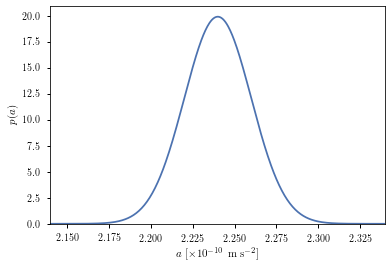

In [65]:
a_odot = 2.24
sigma_a_odot = 0.02
a = np.linspace(a_odot-sigma_a_odot*5, a_odot+sigma_a_odot*5, 500)
def pdf_a(a, *a_odot):
    return norm.pdf(a, *a_odot)

plt.plot(a, pdf_a(a, a_odot, sigma_a_odot))
plt.xlabel(r'$a$ [$\times 10^{-10}$ m s$^{-2}$]')
plt.ylabel(r'$p(a)$')
plt.xlim(a.min(), a.max())
plt.ylim(0)
plt.savefig(join("img", "pdf-a.png"), dpi=300)
plt.show()

In [66]:
sigma_a_odot/a_odot

0.008928571428571428

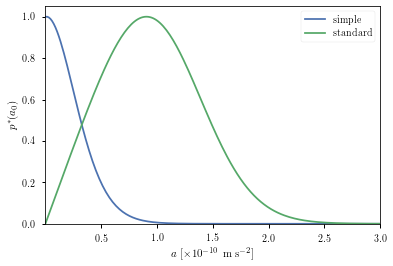

In [67]:
def pdf_a0(a0, mu0_func, *args):
    odot = args[0:2]
    mu0_fit = args[2:]
    a = np.linspace(odot[0]-odot[1]*5, odot[0]+odot[1]*5, 500)
    a0 = np.atleast_1d(a0)
    A0, A = np.meshgrid(a0, a)
    integrand = pdf_a(A, *odot)*pdf_x(A/A0, mu0_func, *mu0_fit)*A/A0**2
    integral = simps(integrand, a, axis=0)
    area = simps(integral, a0)
    return integral/area


args = [a_odot, sigma_a_odot, *mu0_fit]

a0 = np.linspace(0.0001, 3, 200)
pdf_a0_simple = pdf_a0(a0, mu0_simple_func, *args)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), label='simple')
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.xlabel(r'$a$ [$\times 10^{-10}$ m s$^{-2}$]')
plt.ylabel(r'$p^*(a_0)$')
plt.xlim(a0.min(), a0.max())
plt.ylim(0)
plt.legend()
plt.savefig(join("img", "pdf-a0.png"), dpi=300)
plt.show()

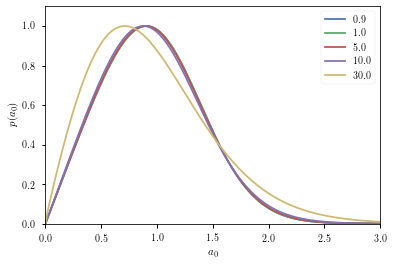

In [68]:
a0 = np.linspace(0.0001, 3, 200)
for s in [sigma_a_odot/a_odot, 0.01, 0.05, 0.10, 0.30]:
    # pdf_a0_simple = pdf_a0(a0, [mu0_simple, mu0_deriv_simple], *args)
    args = [a_odot, s*a_odot, *mu0_fit]
    pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
    # plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), label='simple')
    plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label=f"{s*100:.01f}%")
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(0, 3)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

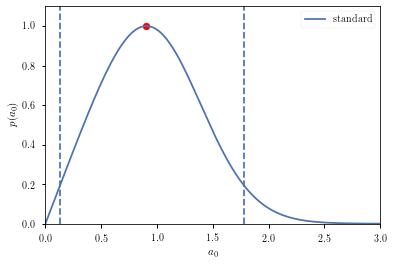

In [69]:


args = [a_odot, sigma_a_odot, *mu0_fit]

hpd, modes = hdi(lambda x: pdf_a0(x, mu0_standard_func, *args), low=0.000001, high=3, alpha=0.05)
low, high = hpd[0]
mode = modes[0]

a0 = np.linspace(0.0001, 3, 200)
pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), label="standard")
plt.axvline(low, color='C0', ls='--')
plt.axvline(high, color='C0', ls='--')
plt.scatter([mode], [1], color='r')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$p(a_0)$')
plt.xlim(0, 3)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

## automate

In [62]:
def pdf_mu0(mu0, *mu0_fit):
    mu0 = np.atleast_1d(mu0)
    return skewnorm.pdf(mu0, *mu0_fit)

def pdf_x(x, mu_func, *mu0_fit):
    x = np.atleast_1d(x)
    mu0 = mu_func[0](x)
    val = pdf_mu0(mu0, *mu0_fit)*np.abs(mu_func[1](x))
    return val

def mu0_simple(x):
    return x/(1+x)
def mu0_deriv_simple(x):
    return 1/(1+x)**2

def mu0_standard(x):
    return x/np.sqrt(1+x**2)
def mu0_deriv_standard(x):
    return 1/np.power(1+x**2, 3/2)

mu0_simple_func = [mu0_simple, mu0_deriv_simple]
mu0_standard_func = [mu0_standard, mu0_deriv_standard]

a_odot = 2.24
sigma_a_odot = 0.02
a = np.linspace(a_odot-sigma_a_odot*5, a_odot+sigma_a_odot*5, 500)
def pdf_a(a, *a_odot):
    return norm.pdf(a, *a_odot)

def pdf_a0(a0, mu0_func, *args):
    odot = args[0:2]
    mu0_fit = args[2:]
    a = np.linspace(odot[0]-odot[1]*5, odot[0]+odot[1]*5, 500)
    a0 = np.atleast_1d(a0)
    A0, A = np.meshgrid(a0, a)
    integrand = pdf_a(A, *odot)*pdf_x(A/A0, mu0_func, *mu0_fit)*A/A0**2
    integral = simps(integrand, a, axis=0)
    area = simps(integral, a0)
    return integral/area

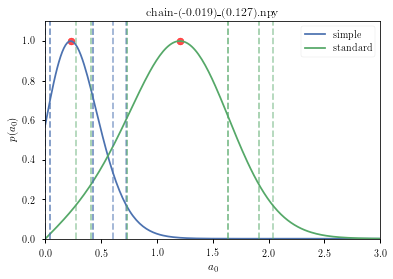

chain-(-0.019)_(0.127).npy
simple:
	 mode: 0.23
	 alpha: 0.32	 low: 0.04	 high: 0.43
	 alpha: 0.10	 low: 0.00	 high: 0.61
	 alpha: 0.05	 low: 0.00	 high: 0.72
standard:
	 mode: 1.21
	 alpha: 0.32	 low: 0.73	 high: 1.64
	 alpha: 0.10	 low: 0.41	 high: 1.91
	 alpha: 0.05	 low: 0.27	 high: 2.04


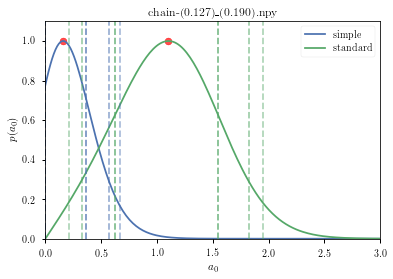

chain-(0.127)_(0.190).npy
simple:
	 mode: 0.16
	 alpha: 0.32	 low: 0.00	 high: 0.36
	 alpha: 0.10	 low: 0.00	 high: 0.57
	 alpha: 0.05	 low: 0.00	 high: 0.67
standard:
	 mode: 1.10
	 alpha: 0.32	 low: 0.62	 high: 1.55
	 alpha: 0.10	 low: 0.33	 high: 1.82
	 alpha: 0.05	 low: 0.21	 high: 1.95


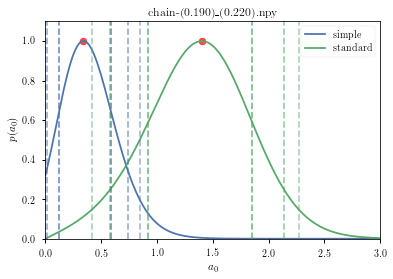

chain-(0.190)_(0.220).npy
simple:
	 mode: 0.34
	 alpha: 0.32	 low: 0.12	 high: 0.59
	 alpha: 0.10	 low: 0.01	 high: 0.74
	 alpha: 0.05	 low: 0.00	 high: 0.85
standard:
	 mode: 1.40
	 alpha: 0.32	 low: 0.92	 high: 1.85
	 alpha: 0.10	 low: 0.58	 high: 2.14
	 alpha: 0.05	 low: 0.42	 high: 2.27


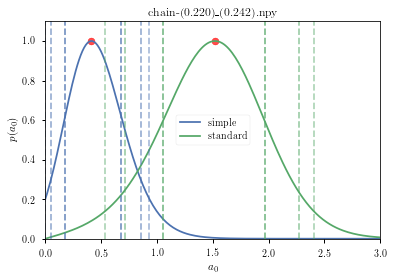

chain-(0.220)_(0.242).npy
simple:
	 mode: 0.41
	 alpha: 0.32	 low: 0.18	 high: 0.68
	 alpha: 0.10	 low: 0.05	 high: 0.86
	 alpha: 0.05	 low: 0.00	 high: 0.93
standard:
	 mode: 1.52
	 alpha: 0.32	 low: 1.05	 high: 1.97
	 alpha: 0.10	 low: 0.71	 high: 2.27
	 alpha: 0.05	 low: 0.53	 high: 2.41


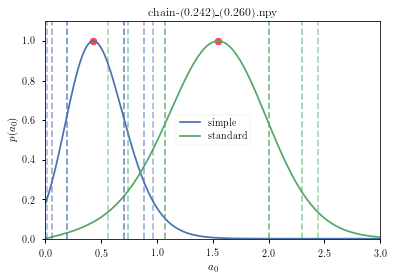

chain-(0.242)_(0.260).npy
simple:
	 mode: 0.43
	 alpha: 0.32	 low: 0.19	 high: 0.70
	 alpha: 0.10	 low: 0.06	 high: 0.88
	 alpha: 0.05	 low: 0.01	 high: 0.96
standard:
	 mode: 1.55
	 alpha: 0.32	 low: 1.07	 high: 2.00
	 alpha: 0.10	 low: 0.74	 high: 2.30
	 alpha: 0.05	 low: 0.56	 high: 2.44


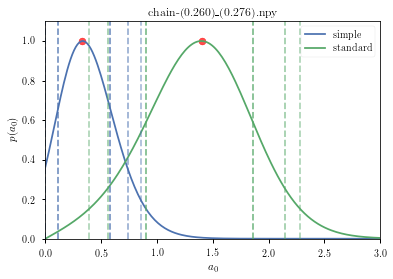

chain-(0.260)_(0.276).npy
simple:
	 mode: 0.33
	 alpha: 0.32	 low: 0.11	 high: 0.58
	 alpha: 0.10	 low: 0.00	 high: 0.74
	 alpha: 0.05	 low: 0.00	 high: 0.86
standard:
	 mode: 1.40
	 alpha: 0.32	 low: 0.90	 high: 1.86
	 alpha: 0.10	 low: 0.56	 high: 2.15
	 alpha: 0.05	 low: 0.39	 high: 2.28


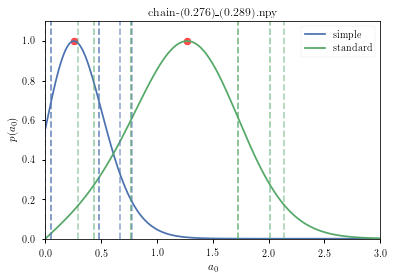

chain-(0.276)_(0.289).npy
simple:
	 mode: 0.26
	 alpha: 0.32	 low: 0.05	 high: 0.48
	 alpha: 0.10	 low: 0.00	 high: 0.67
	 alpha: 0.05	 low: 0.00	 high: 0.78
standard:
	 mode: 1.27
	 alpha: 0.32	 low: 0.77	 high: 1.73
	 alpha: 0.10	 low: 0.44	 high: 2.01
	 alpha: 0.05	 low: 0.29	 high: 2.14


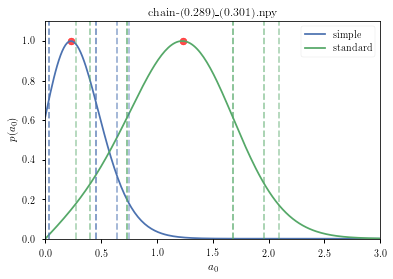

chain-(0.289)_(0.301).npy
simple:
	 mode: 0.23
	 alpha: 0.32	 low: 0.03	 high: 0.45
	 alpha: 0.10	 low: 0.00	 high: 0.64
	 alpha: 0.05	 low: 0.00	 high: 0.75
standard:
	 mode: 1.23
	 alpha: 0.32	 low: 0.73	 high: 1.68
	 alpha: 0.10	 low: 0.40	 high: 1.96
	 alpha: 0.05	 low: 0.27	 high: 2.09


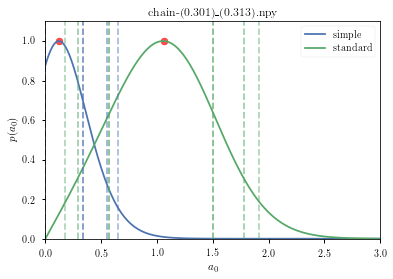

chain-(0.301)_(0.313).npy
simple:
	 mode: 0.12
	 alpha: 0.32	 low: 0.00	 high: 0.34
	 alpha: 0.10	 low: 0.00	 high: 0.55
	 alpha: 0.05	 low: 0.00	 high: 0.65
standard:
	 mode: 1.06
	 alpha: 0.32	 low: 0.57	 high: 1.50
	 alpha: 0.10	 low: 0.29	 high: 1.78
	 alpha: 0.05	 low: 0.18	 high: 1.91


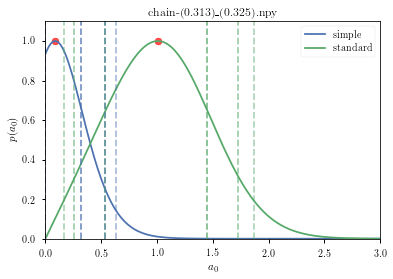

chain-(0.313)_(0.325).npy
simple:
	 mode: 0.09
	 alpha: 0.32	 low: 0.00	 high: 0.32
	 alpha: 0.10	 low: 0.00	 high: 0.53
	 alpha: 0.05	 low: 0.00	 high: 0.63
standard:
	 mode: 1.01
	 alpha: 0.32	 low: 0.53	 high: 1.45
	 alpha: 0.10	 low: 0.26	 high: 1.73
	 alpha: 0.05	 low: 0.17	 high: 1.87


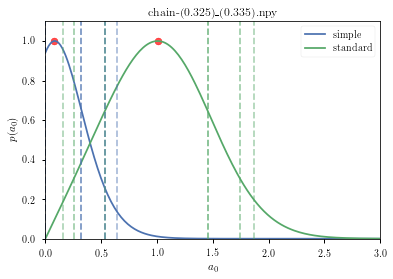

chain-(0.325)_(0.335).npy
simple:
	 mode: 0.08
	 alpha: 0.32	 low: 0.00	 high: 0.32
	 alpha: 0.10	 low: 0.00	 high: 0.53
	 alpha: 0.05	 low: 0.00	 high: 0.64
standard:
	 mode: 1.01
	 alpha: 0.32	 low: 0.53	 high: 1.46
	 alpha: 0.10	 low: 0.26	 high: 1.74
	 alpha: 0.05	 low: 0.16	 high: 1.87


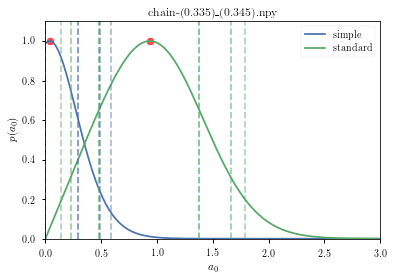

chain-(0.335)_(0.345).npy
simple:
	 mode: 0.04
	 alpha: 0.32	 low: 0.00	 high: 0.29
	 alpha: 0.10	 low: 0.00	 high: 0.49
	 alpha: 0.05	 low: 0.00	 high: 0.59
standard:
	 mode: 0.94
	 alpha: 0.32	 low: 0.48	 high: 1.38
	 alpha: 0.10	 low: 0.23	 high: 1.66
	 alpha: 0.05	 low: 0.14	 high: 1.79


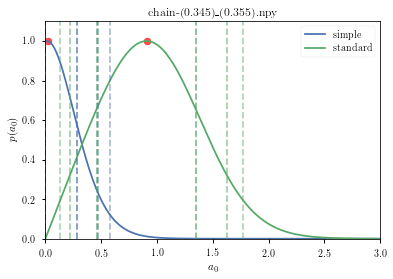

chain-(0.345)_(0.355).npy
simple:
	 mode: 0.02
	 alpha: 0.32	 low: 0.00	 high: 0.28
	 alpha: 0.10	 low: 0.00	 high: 0.47
	 alpha: 0.05	 low: 0.00	 high: 0.58
standard:
	 mode: 0.91
	 alpha: 0.32	 low: 0.46	 high: 1.35
	 alpha: 0.10	 low: 0.22	 high: 1.63
	 alpha: 0.05	 low: 0.13	 high: 1.77


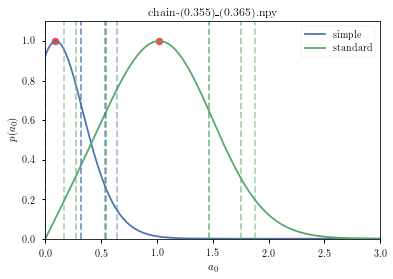

chain-(0.355)_(0.365).npy
simple:
	 mode: 0.09
	 alpha: 0.32	 low: 0.00	 high: 0.32
	 alpha: 0.10	 low: 0.00	 high: 0.53
	 alpha: 0.05	 low: 0.00	 high: 0.64
standard:
	 mode: 1.02
	 alpha: 0.32	 low: 0.54	 high: 1.47
	 alpha: 0.10	 low: 0.27	 high: 1.75
	 alpha: 0.05	 low: 0.17	 high: 1.88


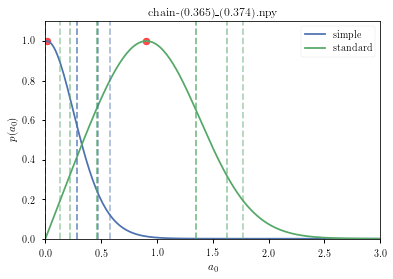

chain-(0.365)_(0.374).npy
simple:
	 mode: 0.01
	 alpha: 0.32	 low: 0.00	 high: 0.28
	 alpha: 0.10	 low: 0.00	 high: 0.47
	 alpha: 0.05	 low: 0.00	 high: 0.58
standard:
	 mode: 0.90
	 alpha: 0.32	 low: 0.46	 high: 1.35
	 alpha: 0.10	 low: 0.22	 high: 1.63
	 alpha: 0.05	 low: 0.13	 high: 1.77


In [63]:
simple_modes = []
simple_errs = []
standard_modes = []
standard_errs = []
mu0_fits = []
for file in files:
    df = np.load(file)
    name = file.split('/')[-1]
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    length = rhob.shape[0]
    rhob0 = np.empty((length, 12))
    for i in range(12):
        rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
    rhob0 = rhob0.sum(axis=1)/1E-2
    # fit
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = norm.fit(rhob_sample)
    rhob0_sample = np.random.choice(rhob0, size=10_000, replace=False)
    rhob0_fit = norm.fit(rhob0_sample)
    # mu0
    mu0 = np.linspace(0.5, 1.5, 1000)
    pdf_mu0_sample = np.sum(norm.pdf(mu0[:, None]*rho[None, :], *rhob0_fit)*norm.pdf(rho[None, :], *rhob_fit)*rho[None, :], axis=1)
    area = np.trapz(pdf_mu0_sample, mu0)
    pdf_mu0_sample /= area

    mu0_fit, _ = curve_fit(skewnorm.pdf, mu0, pdf_mu0_sample, p0=[1, 1.0, 0.1])
    mu0_fits.append(mu0_fit)
    # a0
    sigmas = np.array([0.68, 0.9, 0.95])
    alphas = 1 - sigmas
    args = [a_odot, sigma_a_odot, *mu0_fit]
    a0 = np.linspace(0.0001, 3, 200)

    pdf_a0_simple = pdf_a0(a0, mu0_simple_func, *args)
    pdf_a0_standard = pdf_a0(a0, mu0_standard_func, *args)
    plt.plot(a0, pdf_a0_simple/pdf_a0_simple.max(), c='C0', label='simple')
    plt.plot(a0, pdf_a0_standard/pdf_a0_standard.max(), c='C1', label="standard")
    simple_mode = None
    standard_mode = None
    simple_err = []
    standard_err = []
    for alpha in alphas:
        # simple
        hpd, modes = hdi(lambda x: pdf_a0(x, mu0_simple_func, *args), low=0.000001, high=1.5, alpha=alpha)
        low, high = hpd[0]
        simple_err.append({'alpha': alpha, 'low': low, 'high': high})
        mode = modes[0]
        simple_mode = mode
        plt.axvline(low, color='C0', ls='--', alpha=alpha**(1/4))
        plt.axvline(high, color='C0', ls='--', alpha=alpha**(1/4))
        plt.scatter([mode], [1], color='r', alpha=0.33)
        # standard
        hpd, modes = hdi(lambda x: pdf_a0(x, mu0_standard_func, *args), low=0.000001, high=3, alpha=alpha)
        low, high = hpd[0]
        standard_err.append({'alpha': alpha, 'low': low, 'high': high})
        mode = modes[0]
        standard_mode = mode
        plt.axvline(low, color='C1', ls='--', alpha=alpha**(1/4))
        plt.axvline(high, color='C1', ls='--', alpha=alpha**(1/4))
        plt.scatter([mode], [1], color='r', alpha=0.33)
    simple_modes.append(simple_mode)
    simple_errs.append(simple_err)
    standard_modes.append(standard_mode)
    standard_errs.append(standard_err)

    plt.xlabel(r'$a_0$')
    plt.ylabel(r'$p(a_0)$')
    plt.xlim(0, 3)
    plt.ylim(0, 1.1)
    plt.legend()
    plt.title(name)
    plt.show()
    print(name)
    print(f"simple:")
    print(f"\t mode: {simple_mode:.02f}")
    for i in range(3):
        print(f"\t alpha: {simple_err[i]['alpha']:.02f}\t low: {simple_err[i]['low']:.02f}\t high: {simple_err[i]['high']:.02f}")
    print(f"standard:")
    print(f"\t mode: {standard_mode:.02f}")
    for i in range(3):
        print(f"\t alpha: {standard_err[i]['alpha']:.02f}\t low: {standard_err[i]['low']:.02f}\t high: {standard_err[i]['high']:.02f}")
    print("====================================================================")
    # break



In [64]:
simple_modes = np.array(simple_modes)
simple_errs = np.array(simple_errs)
standard_modes = np.array(standard_modes)
standard_errs = np.array(standard_errs)
mu0_fits =  np.array(mu0_fits)

(0.0, 2.0)

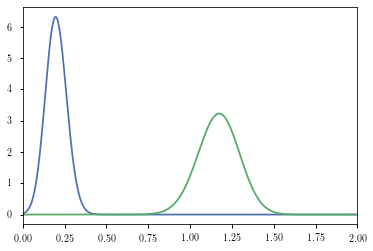

In [65]:
# combined a0
a0s = np.linspace(0.00001, 3, 1000)
a0_simple_com = None
a0_standard_com = None
for mu0_fit in mu0_fits:
    args = [a_odot, sigma_a_odot, *mu0_fit]
    if a0_simple_com is None:
        a0_simple_com = pdf_a0(a0s, mu0_simple_func, *args)
    else:
        a0_simple_com *= pdf_a0(a0s, mu0_simple_func, *args)
    if a0_standard_com is None:
        a0_standard_com = pdf_a0(a0s, mu0_standard_func, *args)
    else:
        a0_standard_com *= pdf_a0(a0s, mu0_standard_func, *args)
# find area
area = simps(a0_simple_com, a0s)
a0_simple_com /= area
area = simps(a0_standard_com, a0s)
a0_standard_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(a0s, a0_simple_com, label='simple')
ax.plot(a0s, a0_standard_com, label='standard')
ax.set_xlim(0,2)


(0.0, 2.0)

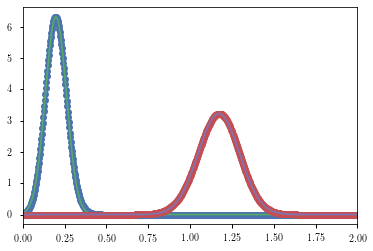

In [66]:
from scipy.optimize import curve_fit

def normal(x, a, loc, scale):
    return norm.pdf(x, loc=loc, scale=scale) * a

a0_simple_fit, _ = curve_fit(normal, a0s, a0_simple_com)
a0_standard_fit, _ = curve_fit(normal, a0s, a0_standard_com)

fig, ax = plt.subplots()
ax.plot(a0s, a0_simple_com, label='simple', marker='o')
ax.plot(a0s, normal(a0s, *a0_simple_fit), label='simple fit')
ax.plot(a0s, a0_standard_com, label='standard', marker='o')
ax.plot(a0s, normal(a0s, *a0_standard_fit), label='standard fit')
ax.set_xlim(0,2)

In [67]:
from scipy.optimize import curve_fit

a0_simple_com_fit, _ = curve_fit(skewnorm.pdf, a0s, a0_simple_com, p0=[1, 1.0, 2.0])
a0_standard_com_fit, _ = curve_fit(skewnorm.pdf, a0s, a0_standard_com, p0=[1, 1.0, 2.0])
a0_simple_com_fit, a0_standard_com_fit

(array([0.8335199 , 0.16210997, 0.07370826]),
 array([-0.72904979,  1.23546193,  0.1403484 ]))

(0.0, 2.0)

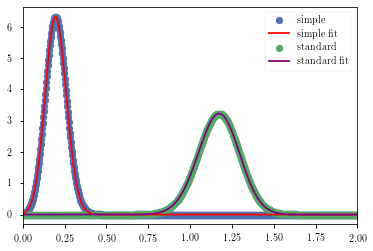

In [68]:
plt.scatter(a0s, a0_simple_com, label='simple')
plt.plot(a0s, skewnorm.pdf(a0s, *a0_simple_com_fit), c='r', label='simple fit')
plt.scatter(a0s, a0_standard_com, label='standard')
plt.plot(a0s, skewnorm.pdf(a0s, *a0_standard_com_fit), c='purple', label='standard fit')
plt.legend()
plt.xlim(0,2)

In [69]:
a0_simple_com_errs = []
a0_standard_com_errs = []
a0_simple_com_mode = 0
a0_standard_com_mode = 0
for i, alpha in enumerate(alphas):
    hpd, modes = hdi(lambda x: skewnorm.pdf(x, *a0_simple_com_fit), -0.5, 5., alpha=alpha, res=10_000)
    low, high = hpd[0]
    a0_simple_com_mode = modes[0]
    a0_simple_com_errs.append({'alpha': alpha, 'low': low, 'high': high})
    hpd, modes = hdi(lambda x: skewnorm.pdf(x, *a0_standard_com_fit), -0.5, 5., alpha=alpha, res=10_000)
    low, high = hpd[0]
    a0_standard_com_mode = modes[0]
    a0_standard_com_errs.append({'alpha': alpha, 'low': low, 'high': high})

In [70]:
a0_simple_com_mode, a0_simple_com_errs

(0.2,
 [{'alpha': 0.31999999999999995, 'low': 0.14, 'high': 0.26},
  {'alpha': 0.09999999999999998, 'low': 0.1, 'high': 0.3},
  {'alpha': 0.050000000000000044, 'low': 0.08, 'high': 0.32}])

In [71]:
a0_standard_com_mode, a0_standard_com_errs

(1.17,
 [{'alpha': 0.31999999999999995, 'low': 1.05, 'high': 1.3},
  {'alpha': 0.09999999999999998, 'low': 0.97, 'high': 1.37},
  {'alpha': 0.050000000000000044, 'low': 0.93, 'high': 1.41}])

In [72]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

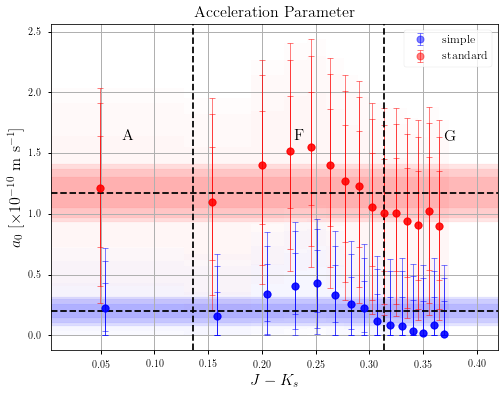

In [74]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)
dc = c2-c1

def band(ax, c1, c2, low, high, color='blue', alpha=0.1):
    ax.fill_between([c1, c2], [low, low], [high, high], color=color, alpha=alpha)
    return 

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(3):
    low = np.array([arr[i]['low'] for arr in simple_errs])
    high = np.array([arr[i]['high'] for arr in simple_errs])  
    simple_ax = ax.errorbar(c, simple_modes, yerr=[simple_modes-low, high-simple_modes], fmt='o', 
                        color='blue', capsize=3, alpha=0.5, elinewidth=1, markeredgewidth=1)
    for j in range(len(c)):
        band(ax, c1[j], c2[j], low[j], high[j], color='blue', alpha=0.01)
    low = np.array([arr[i]['low'] for arr in standard_errs])
    high = np.array([arr[i]['high'] for arr in standard_errs])  
    standard_ax = ax.errorbar(c-0.005, standard_modes, yerr=[standard_modes-low, high-standard_modes], fmt='o', 
                        color='red', capsize=3, alpha=0.5, elinewidth=1, markeredgewidth=1)
    for j in range(len(c)):
        band(ax, c1[j], c2[j], low[j], high[j], color='red', alpha=0.01)
    ax.fill_between(cs, a0_simple_com_errs[i]['low'], a0_simple_com_errs[i]['high'], color='blue', alpha=0.1)
    ax.fill_between(cs, a0_standard_com_errs[i]['low'], a0_standard_com_errs[i]['high'], color='red', alpha=0.1)
    if i == 2:
        ax.legend([simple_ax, standard_ax], 
                  ['simple', 'standard'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=a0_simple_com_mode, color='black', linestyle='--')
ax.axhline(y=a0_standard_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$a_0$ [$\times 10^{-10}$ m s$^{-1}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Acceleration Parameter", fontsize=16)
ax.text(0.07, 1.6, r'$\textup{A}$', fontsize=16)
ax.text(0.23, 1.6, r'$\textup{F}$', fontsize=16)
ax.text(0.37, 1.6, r'$\textup{G}$', fontsize=16)
ax.grid()
fig.savefig(join('img', 'a0.pdf'), dpi=70)
plt.show()

In [66]:
for i in range(len(c)):
    low_simple = np.array([err[0]['low'] for err in simple_errs])
    high_simple = np.array([err[0]['high'] for err in simple_errs])
    low_standard = np.array([err[0]['low'] for err in standard_errs])
    high_standard = np.array([err[0]['high'] for err in standard_errs])

    print(f"$[{c1[i]:.03f},{c2[i]:.03f}]$ & {simple_modes[i]:.02f} & $[{low_simple[i]:.02f},{high_simple[i]:.02f}]$ & {standard_modes[i]:.02f} & $[{low_standard[i]:.02f},{high_standard[i]:.02f}]$ \\\\")

$[-0.019,0.127]$ & 0.23 & $[0.04,0.44]$ & 1.21 & $[0.73,1.65]$ \\
$[0.127,0.190]$ & 0.16 & $[0.00,0.35]$ & 1.10 & $[0.62,1.55]$ \\
$[0.190,0.220]$ & 0.34 & $[0.12,0.59]$ & 1.41 & $[0.93,1.86]$ \\
$[0.220,0.242]$ & 0.41 & $[0.17,0.67]$ & 1.51 & $[1.04,1.97]$ \\
$[0.242,0.260]$ & 0.43 & $[0.19,0.69]$ & 1.54 & $[1.07,1.99]$ \\
$[0.260,0.276]$ & 0.33 & $[0.11,0.58]$ & 1.39 & $[0.90,1.84]$ \\
$[0.276,0.289]$ & 0.26 & $[0.05,0.48]$ & 1.27 & $[0.78,1.73]$ \\
$[0.289,0.301]$ & 0.22 & $[0.03,0.44]$ & 1.22 & $[0.72,1.67]$ \\
$[0.301,0.313]$ & 0.12 & $[0.00,0.34]$ & 1.06 & $[0.58,1.51]$ \\
$[0.313,0.325]$ & 0.09 & $[0.00,0.32]$ & 1.01 & $[0.54,1.46]$ \\
$[0.325,0.335]$ & 0.09 & $[0.00,0.32]$ & 1.01 & $[0.53,1.45]$ \\
$[0.335,0.345]$ & 0.04 & $[0.00,0.29]$ & 0.94 & $[0.48,1.39]$ \\
$[0.345,0.355]$ & 0.02 & $[0.00,0.29]$ & 0.92 & $[0.46,1.37]$ \\
$[0.355,0.365]$ & 0.10 & $[0.00,0.33]$ & 1.02 & $[0.55,1.48]$ \\
$[0.365,0.374]$ & 0.01 & $[0.00,0.28]$ & 0.91 & $[0.46,1.35]$ \\
